In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('20_dataset_3.csv')

In [3]:
weights = {
    1: 0.3,  # Weight for "Very good"
    2: 0.2,  # Weight for "Good"
    3: 0.15,  # Weight for "Fair"
    4: 0.1,  # Weight for "Poor"
    5: 0.05  # Weight for "Very poor"
}

df['D_1_1_w'] = df['D_1_1'].map(weights)

In [4]:
scaling_factor = 0.5  

df['EQ5D_scaled'] = df['EQ5D'] * scaling_factor

In [5]:
df['new'] = df['D_1_1_w'] + df['EQ5D_scaled']

In [6]:
threshold1 = 0.5
threshold2 = 0.7

df['class'] = np.where(df['new'] < threshold1, 0,
                         np.where(df['new'] < threshold2, 1, 2))

In [7]:
df['class'].value_counts()

1    2065
2     647
0     226
Name: class, dtype: int64

In [12]:
#'BS3_2','HE_BMI'
x = df.drop(['ID','D_1_1','LQ_1EQL', 'LQ_2EQL', 'LQ_3EQL', 'LQ_4EQL', 'LQ_5EQL','sub_health','y_new','eq5d_100','y_class','EQ5D','D_1_1_w','new','EQ5D_scaled','class'], axis=1)
y = df['class']

In [10]:
x

,sex,age,BD1_11,BD2_1,dr_month,BP16_1,BS3_1,BE8_1,BE3_31,BE3_32,BE5_1,pa_aerobic,HE_obe,BM1_0,E_NWT,L_BR_FQ,LS_1YR
0,2,58,2,1,0,6,0,8,6,3,6,1,4,1,1,1,1
1,2,53,3,2,1,7,0,10,8,1,1,0,2,1,3,2,1
2,2,53,1,0,0,6,0,6,8,1,1,0,3,1,4,1,1
3,2,74,1,0,0,6,0,16,8,1,1,1,4,1,1,1,1
4,2,47,4,4,1,6,1,10,6,1,1,0,4,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2,58,1,0,0,6,0,4,7,2,2,1,3,1,1,1,2
2934,2,61,2,1,0,7,0,4,1,1,1,0,3,1,4,1,1
2935,2,51,2,2,0,7,0,6,4,0,3,1,3,1,4,3,1
2936,1,65,4,3,1,7,1,4,8,4,6,0,4,1,2,1,1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=0)

training_accuracy = []
test_accuracy = []

n_settings = [50, 100, 200, 300]          #tree의 개수

for n in n_settings:
        
        forest = RandomForestClassifier(n_estimators=n, random_state=0)
        forest.fit(X_train, y_train)
    
        y_train_hat = forest.predict(X_train)
        y_test_hat = forest.predict(X_test)
    
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        test_accuracy.append(accuracy_score(y_test, y_test_hat))
    
pd.DataFrame({"n_estimators":sorted(n_settings), "training accuracy": training_accuracy, "test accuracy": test_accuracy})

,n_estimators,training accuracy,test accuracy
0,50,1.0,0.702381
1,100,1.0,0.705782
2,200,1.0,0.702381
3,300,1.0,0.705782


(-1.0, 19.0)

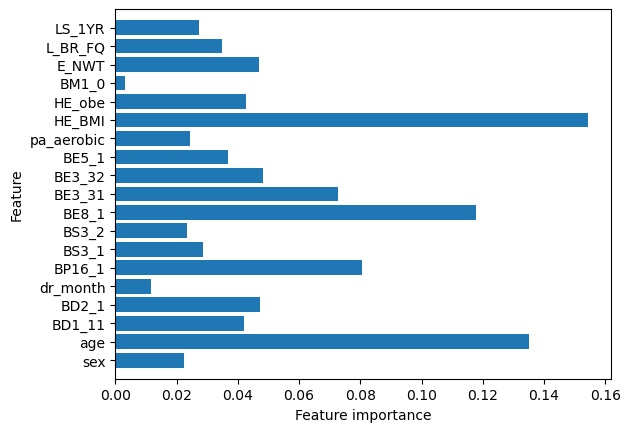

In [15]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x, y)

n_features = x.shape[1]
plt.barh(np.arange(n_features), clf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), (x.columns))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

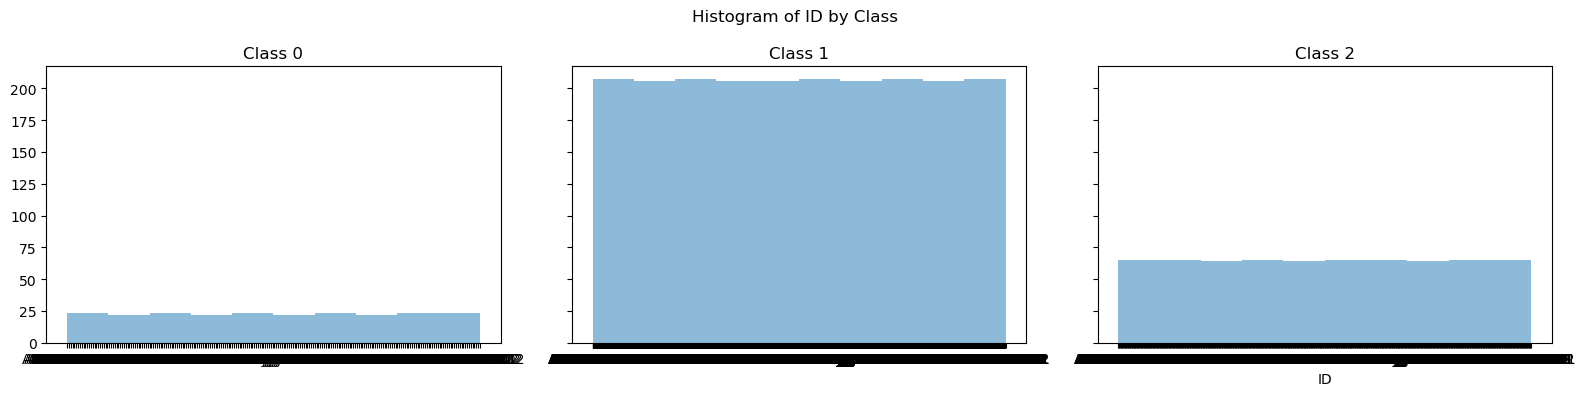

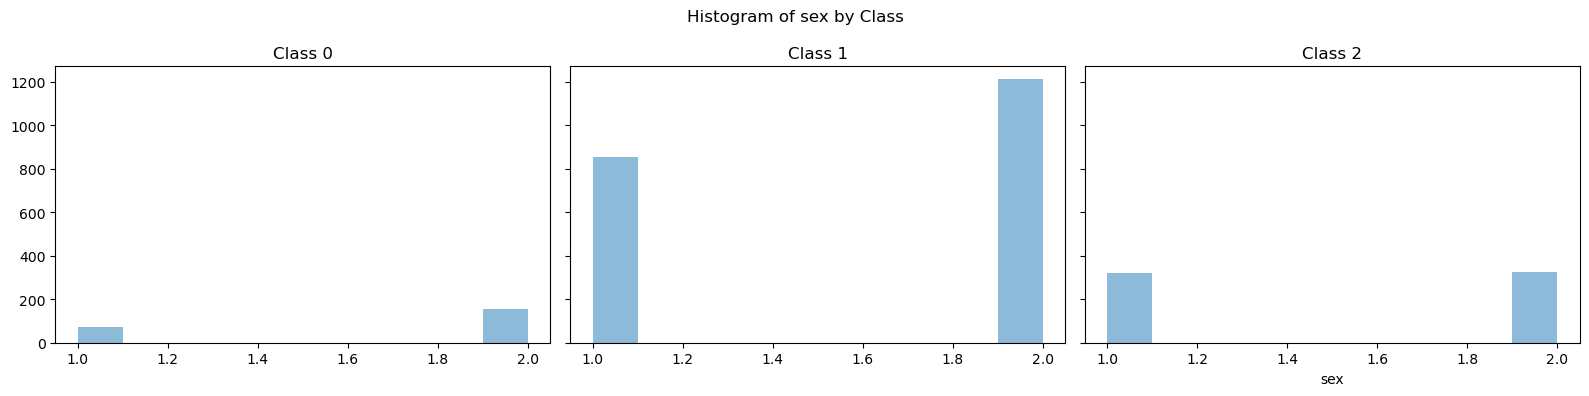

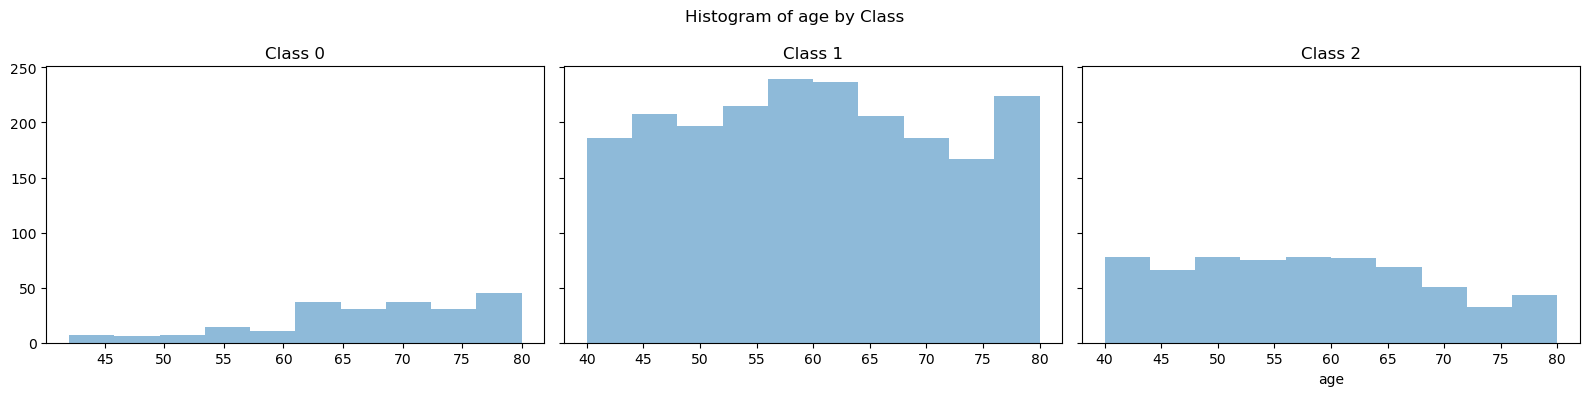

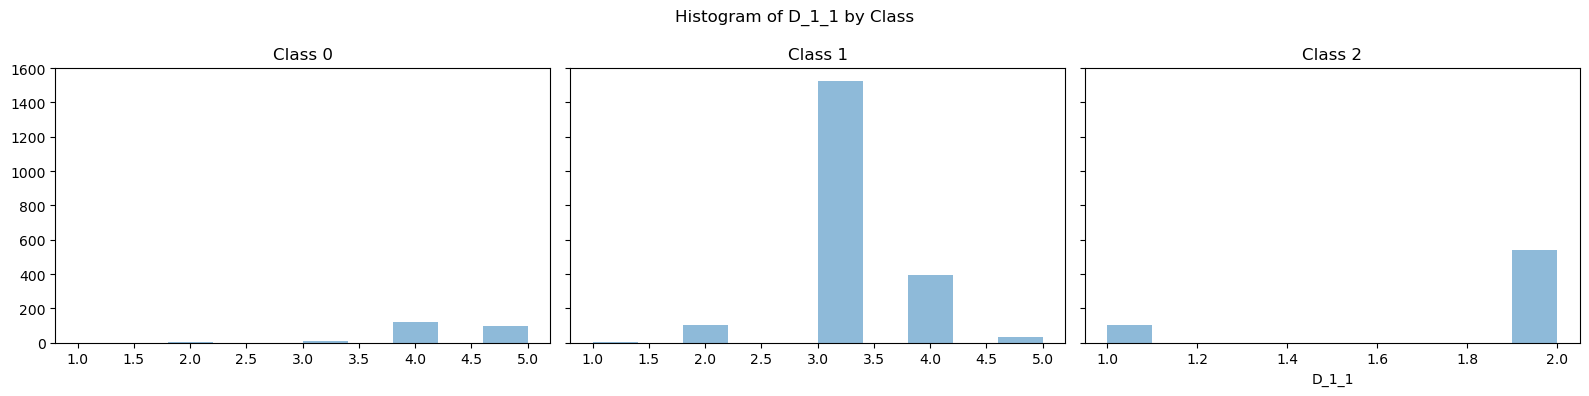

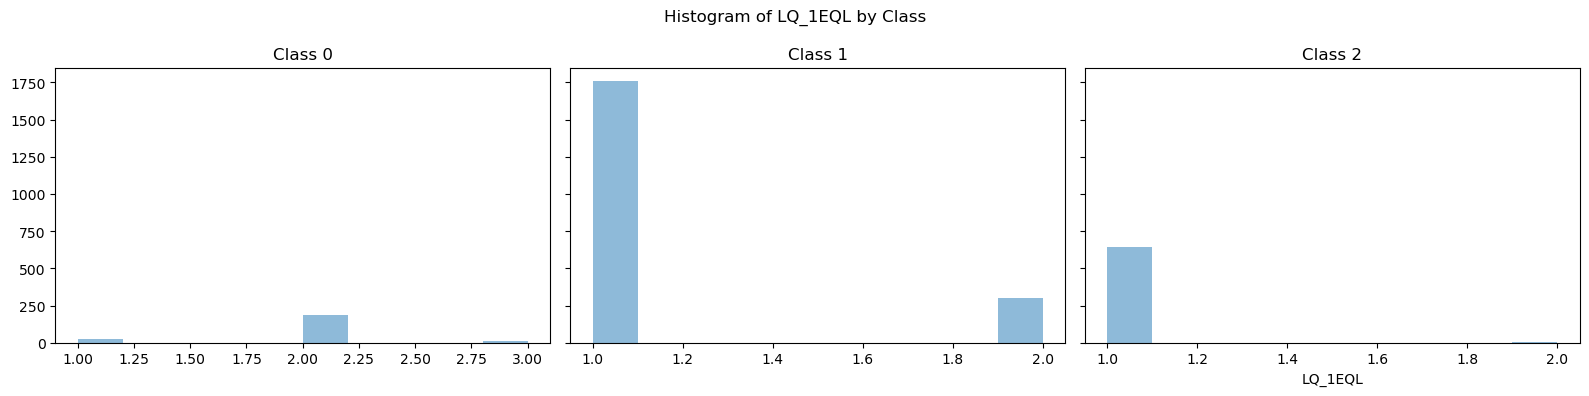

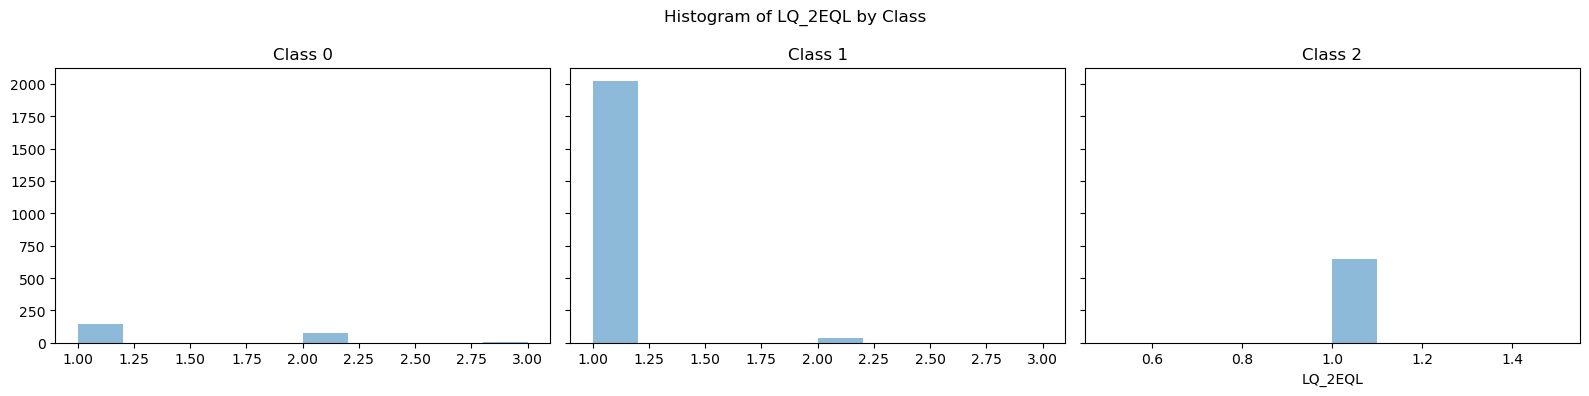

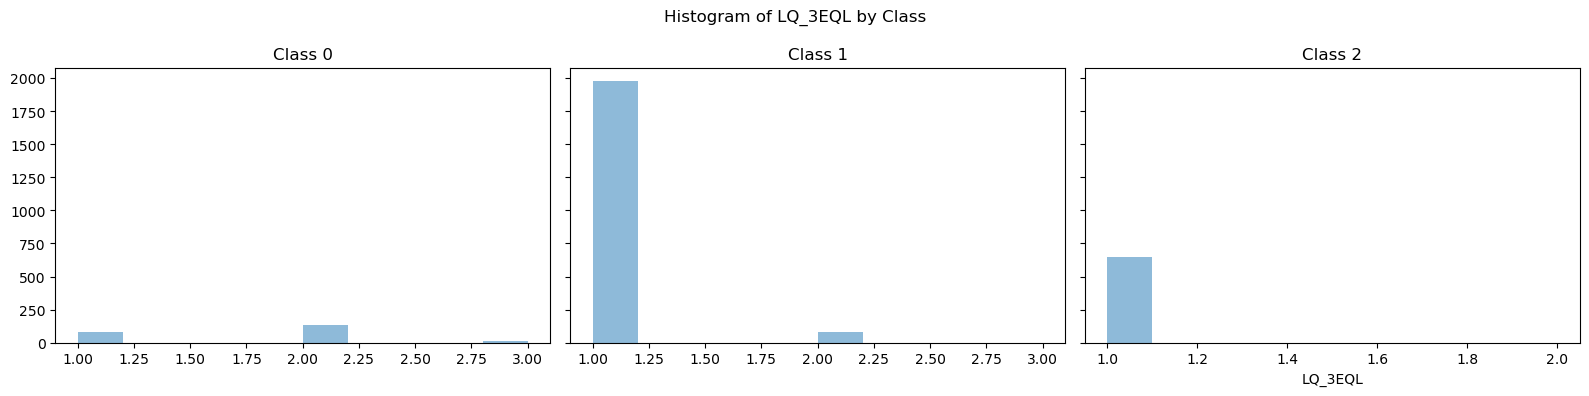

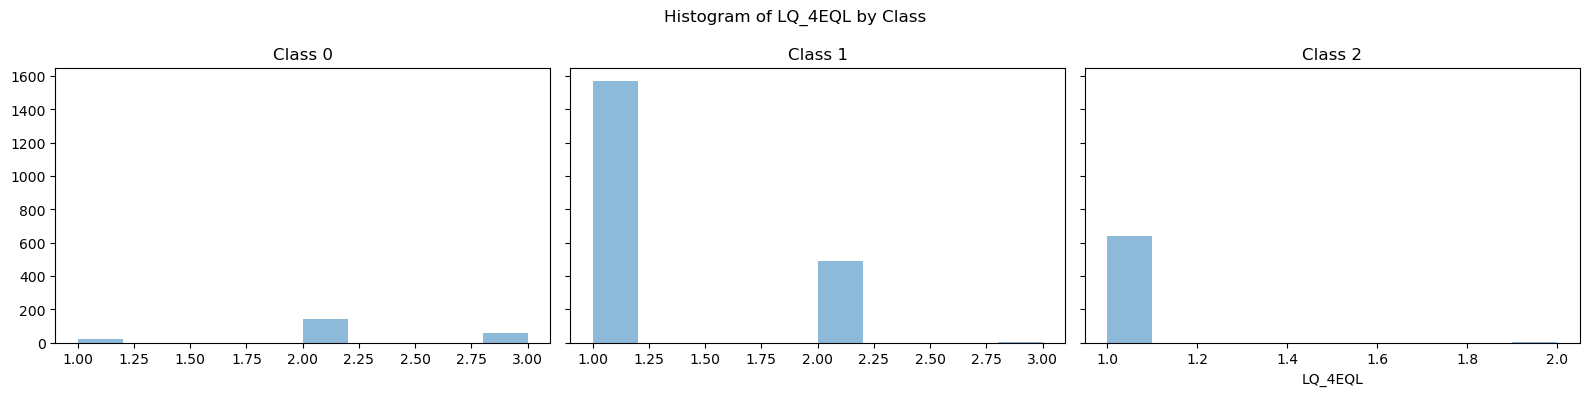

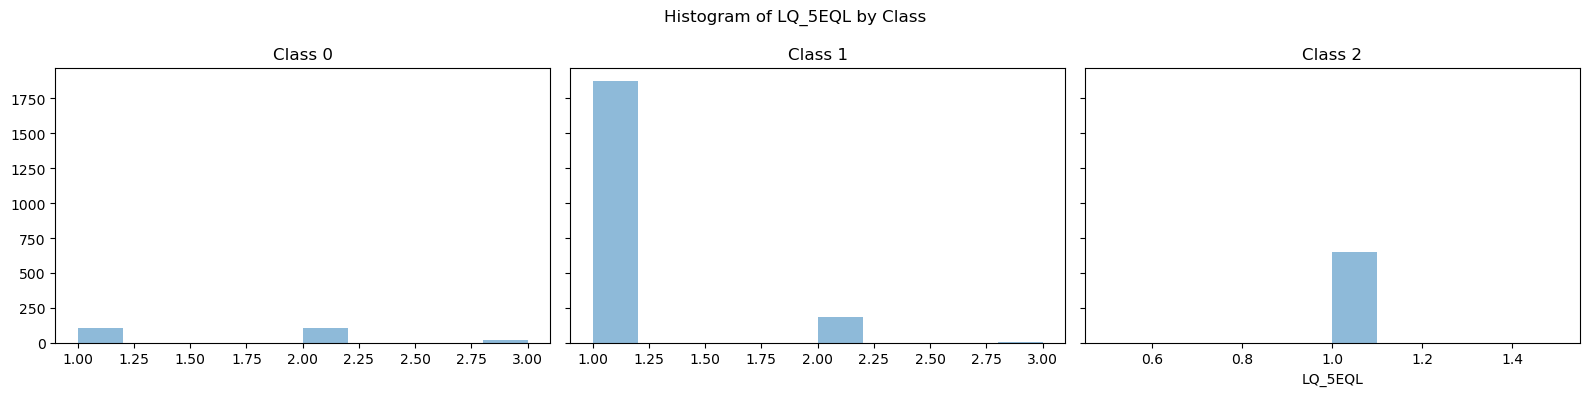

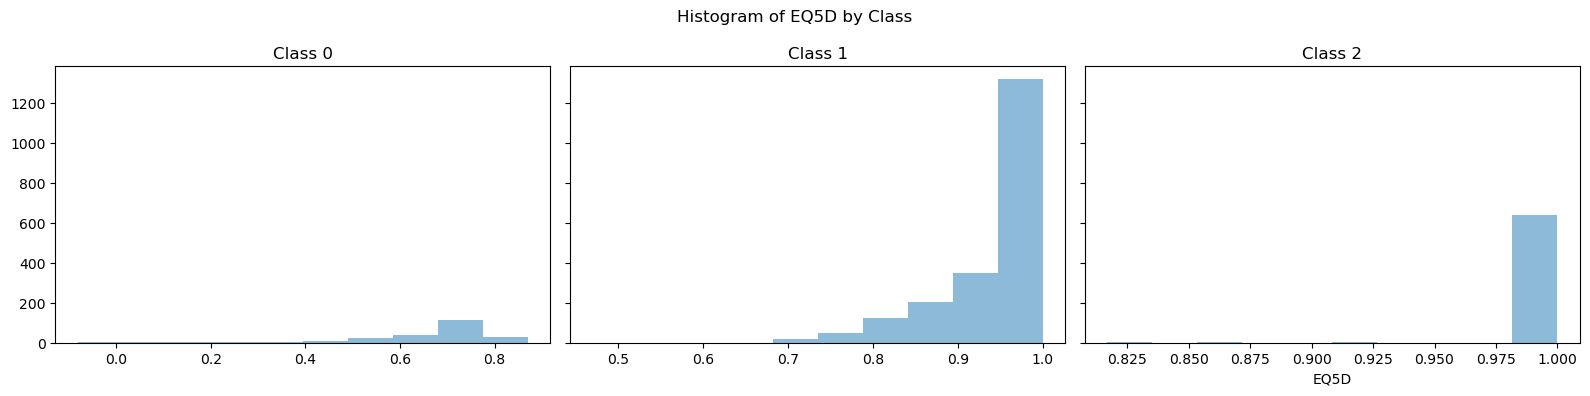

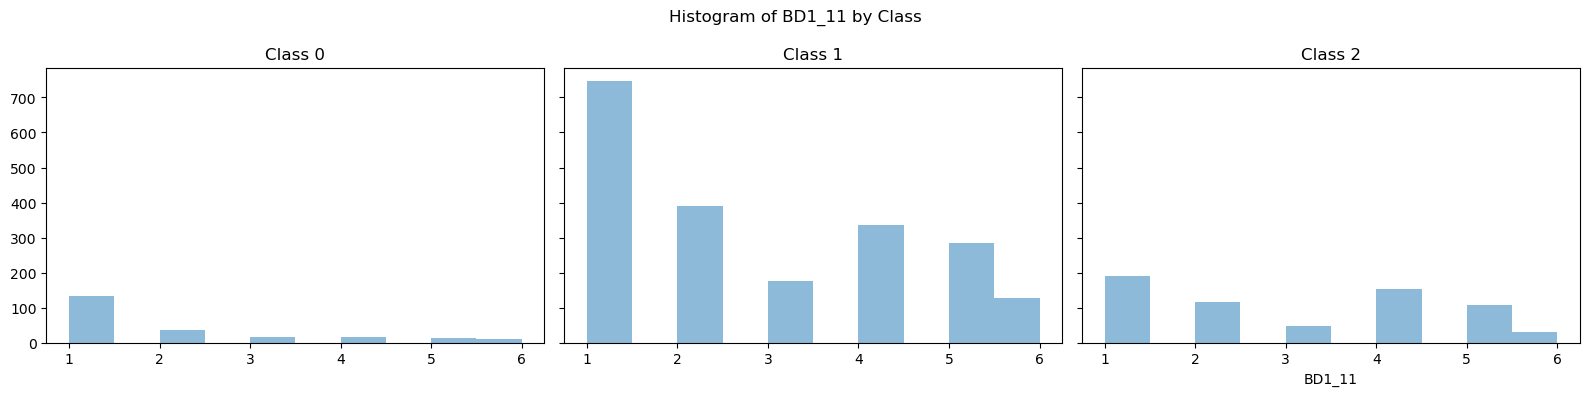

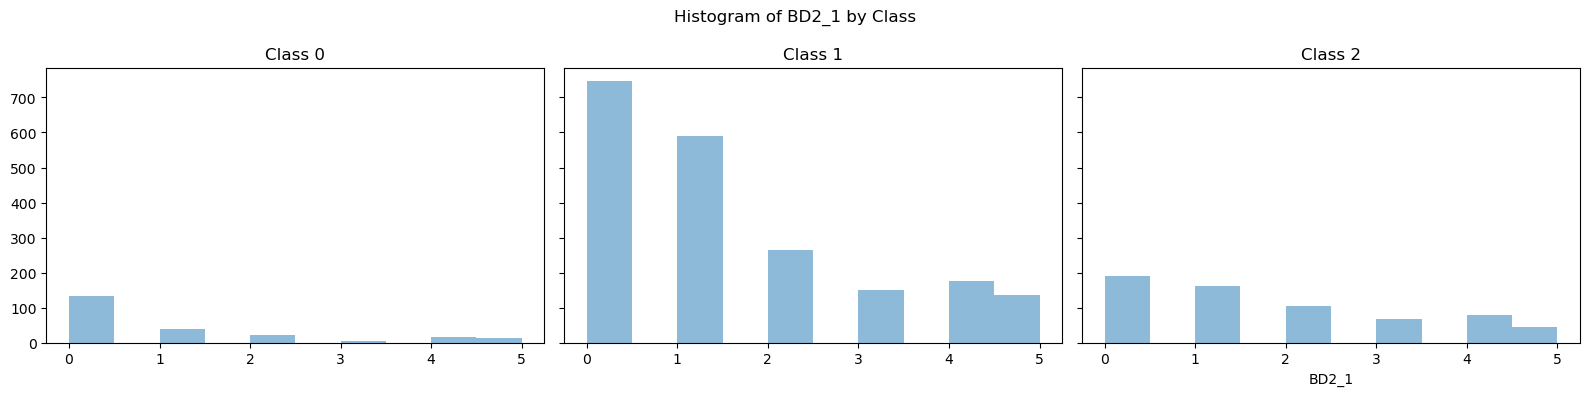

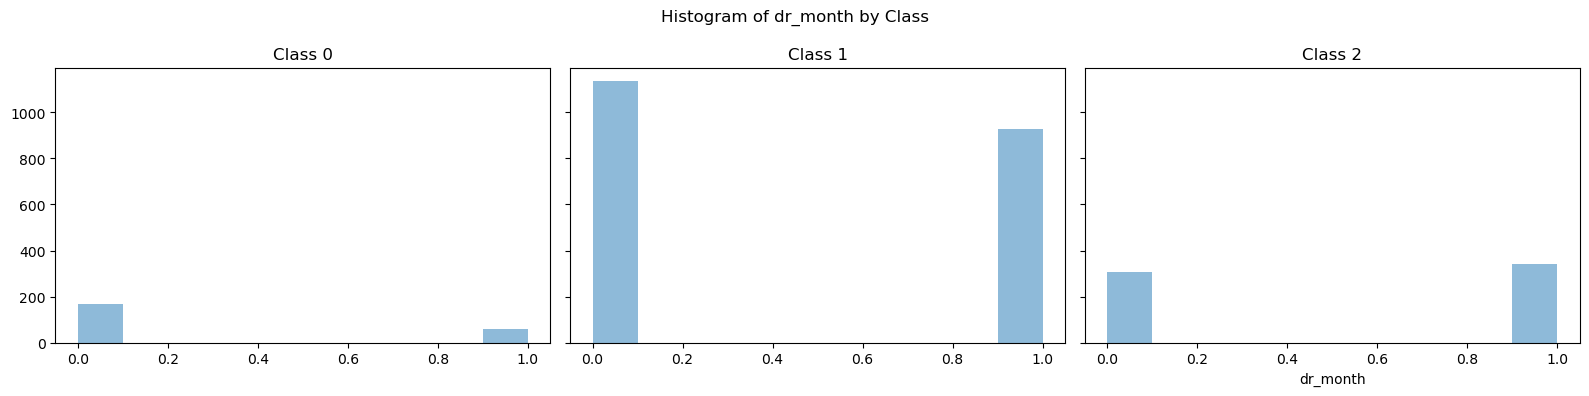

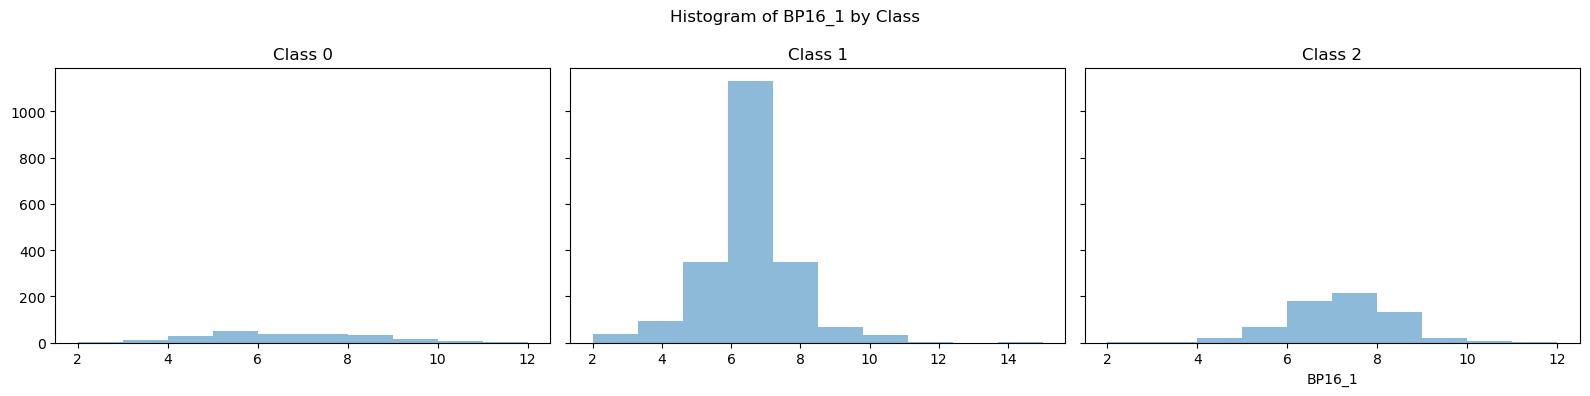

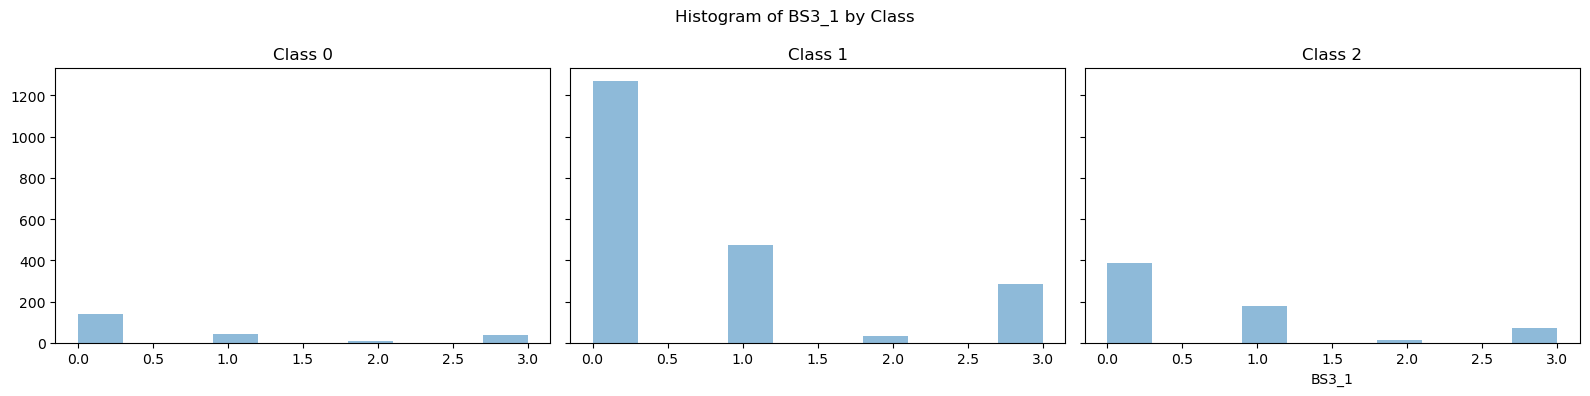

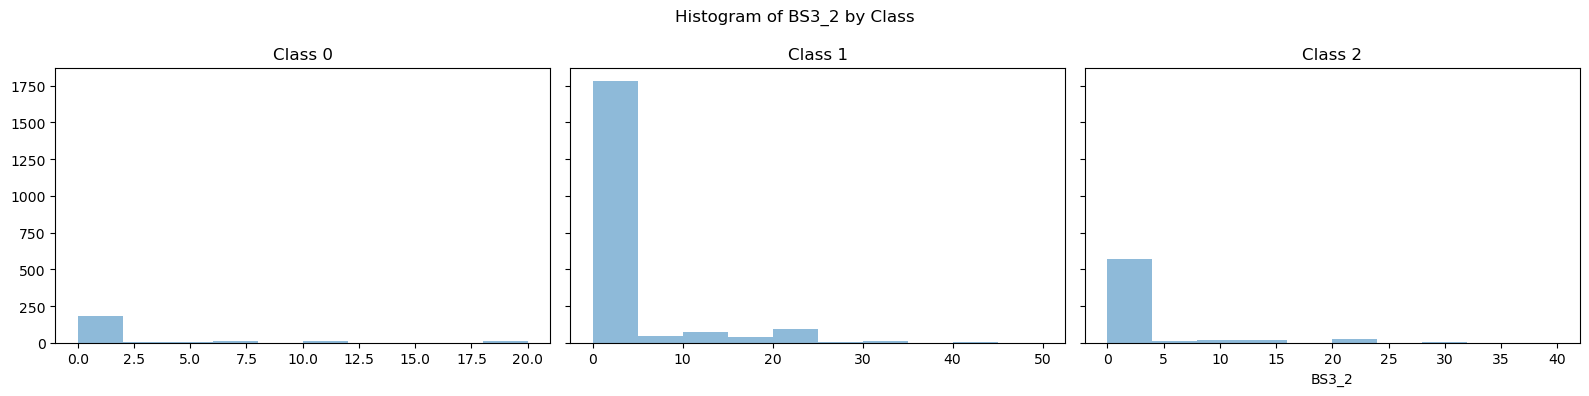

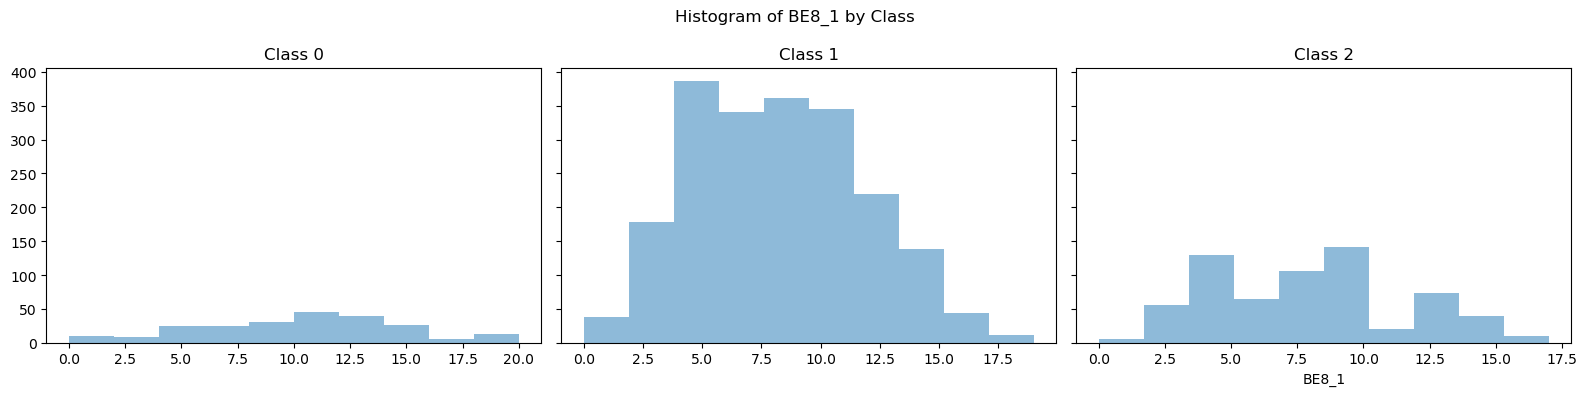

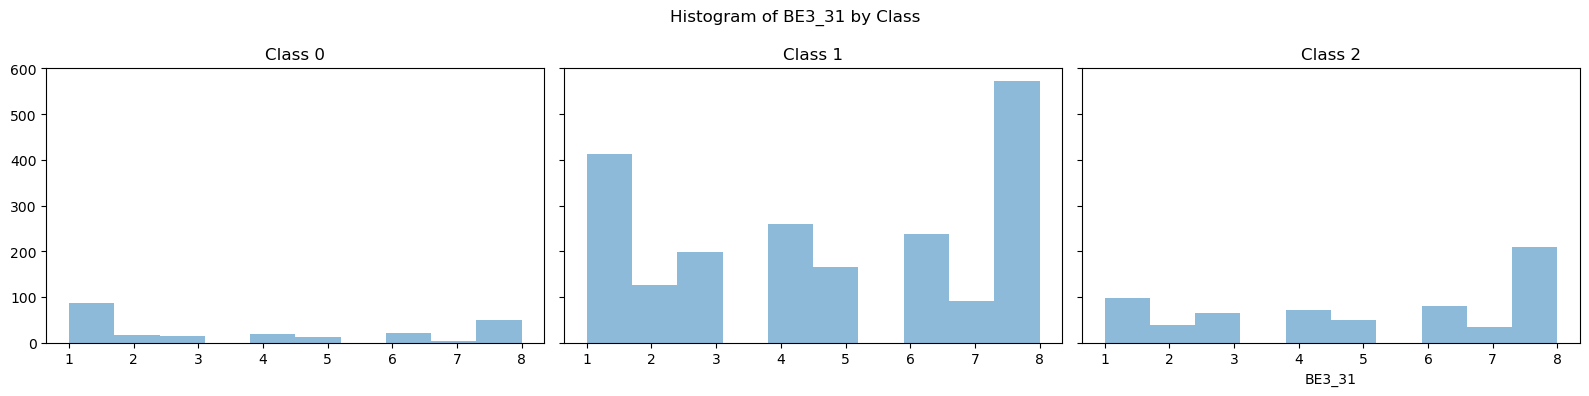

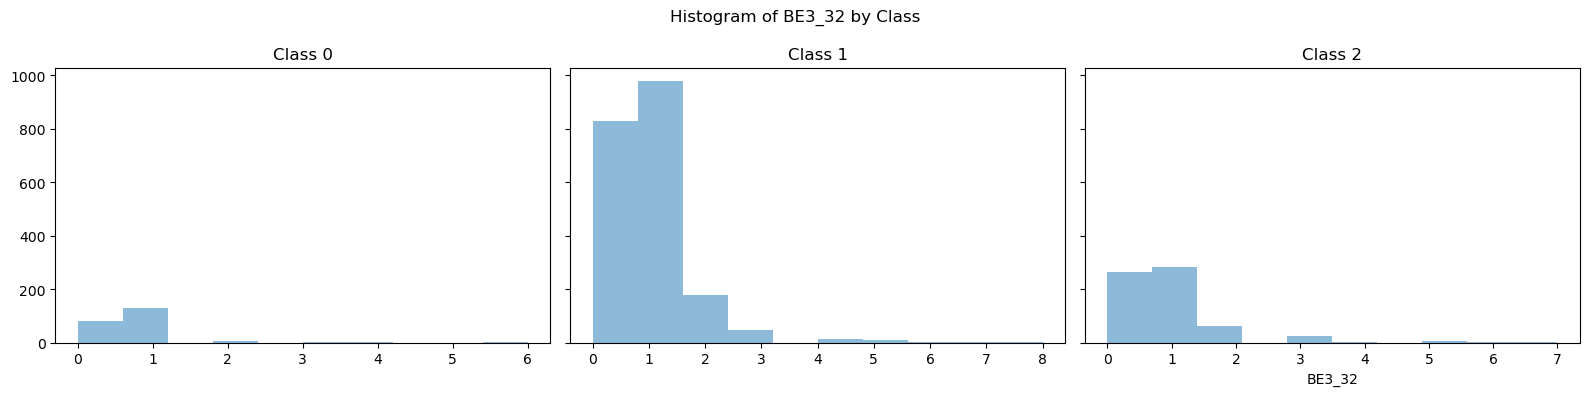

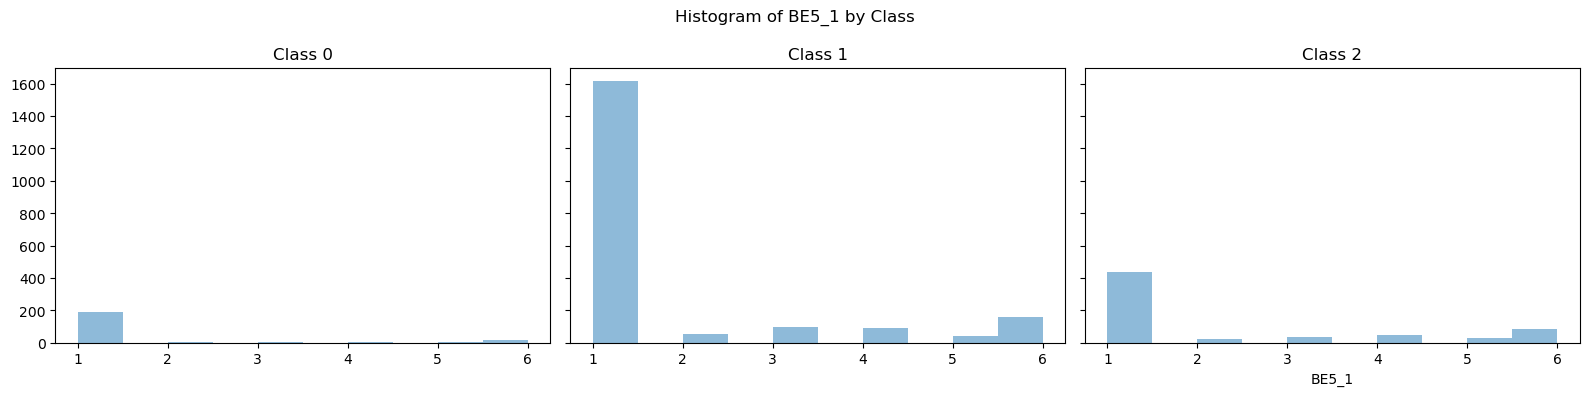

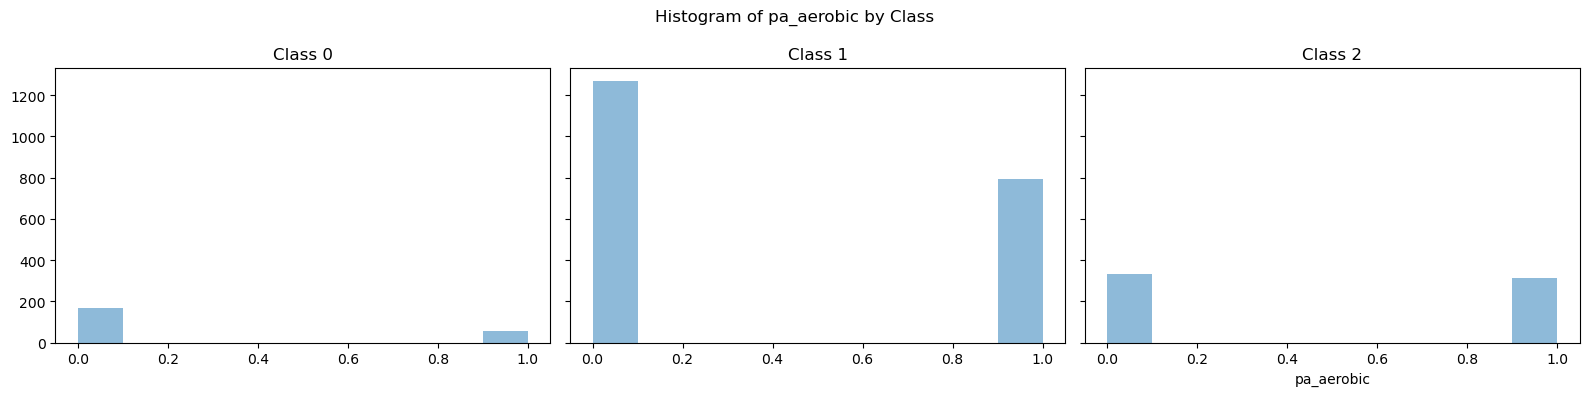

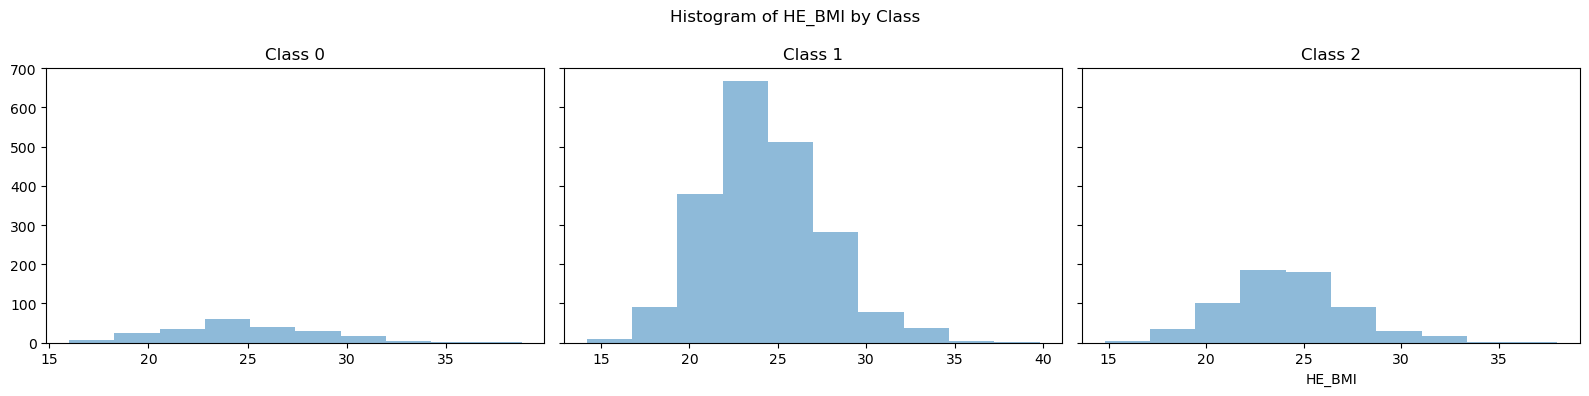

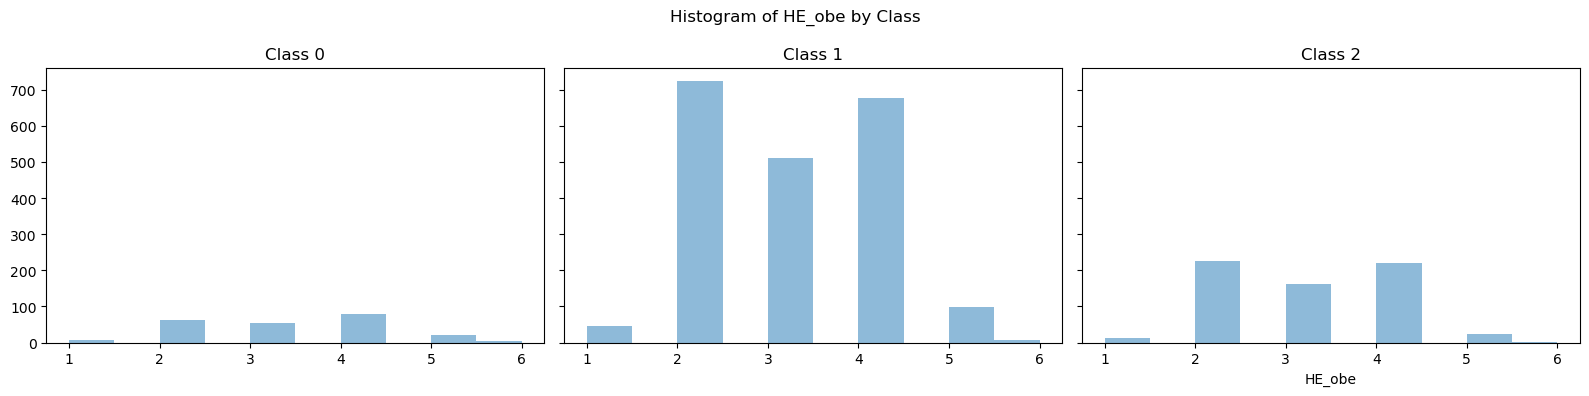

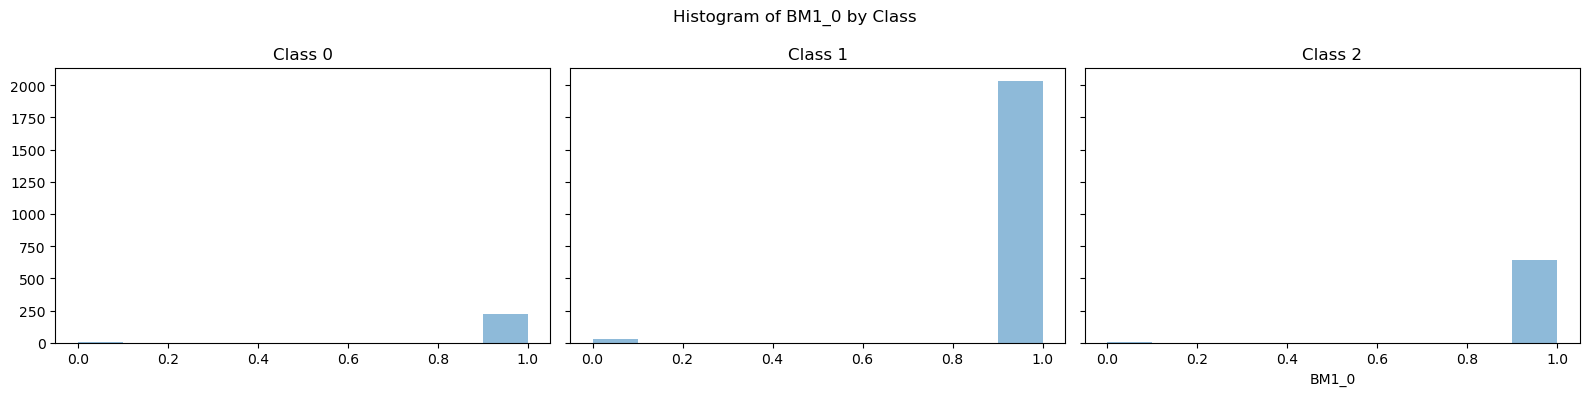

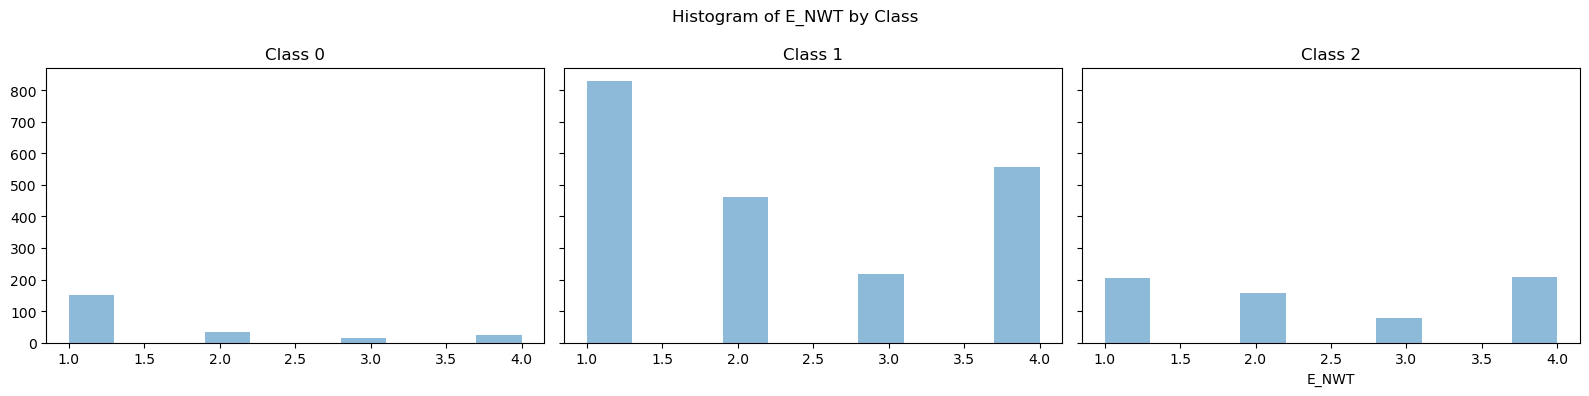

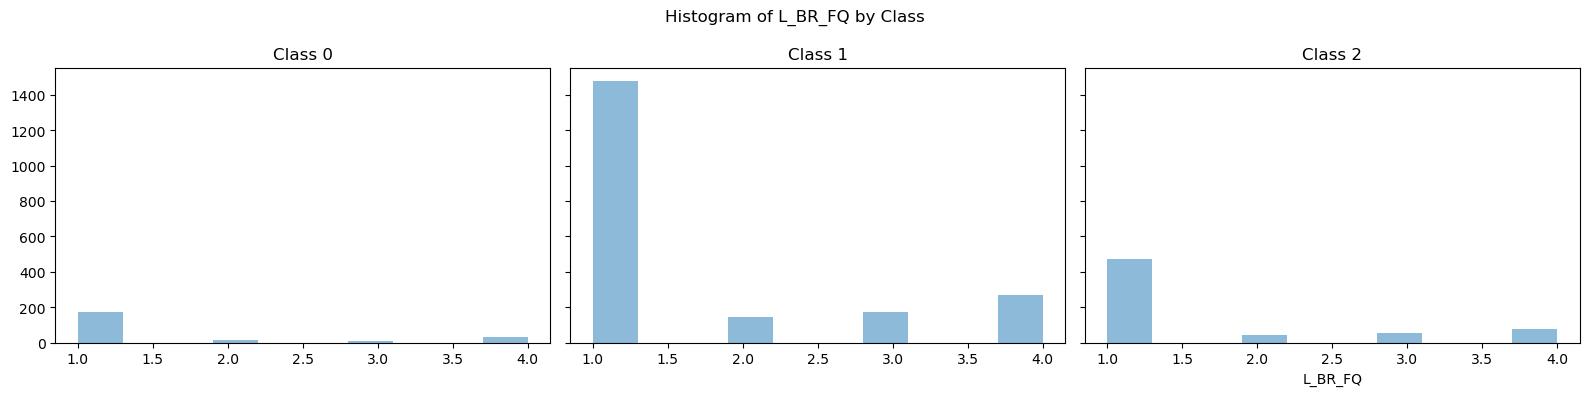

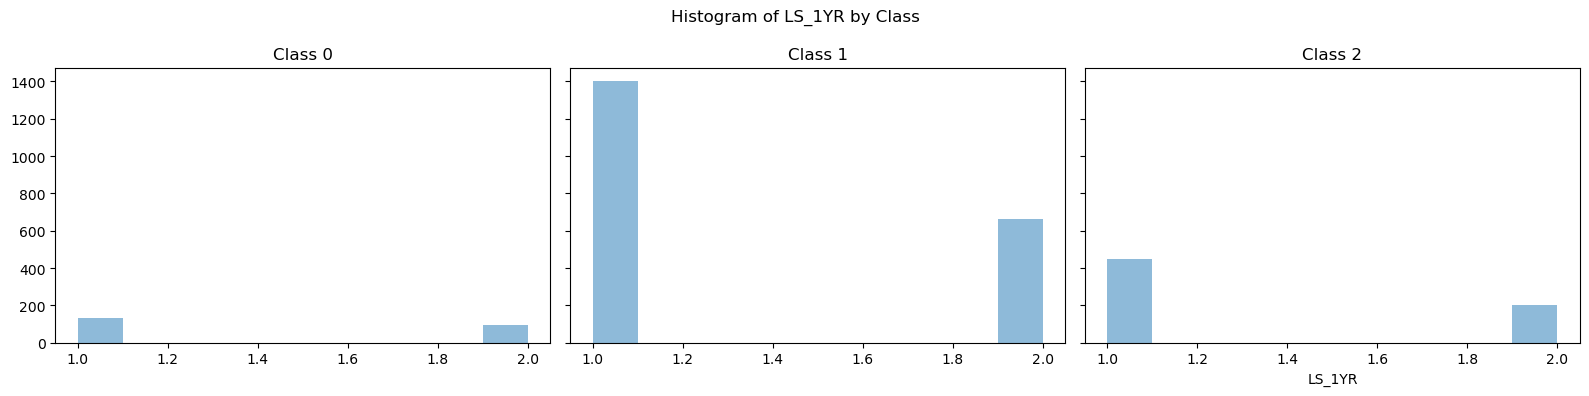

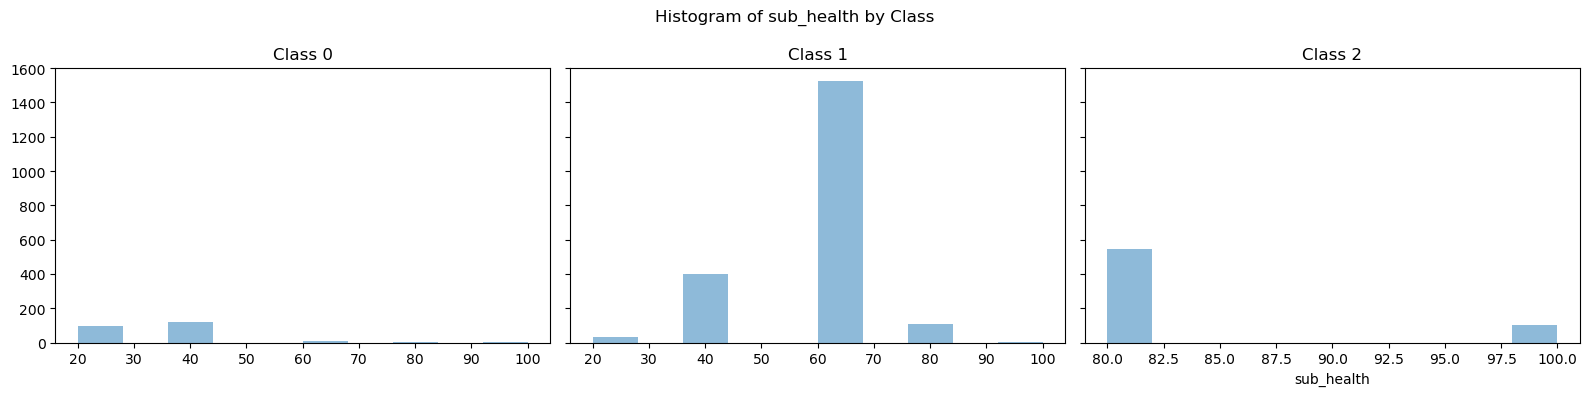

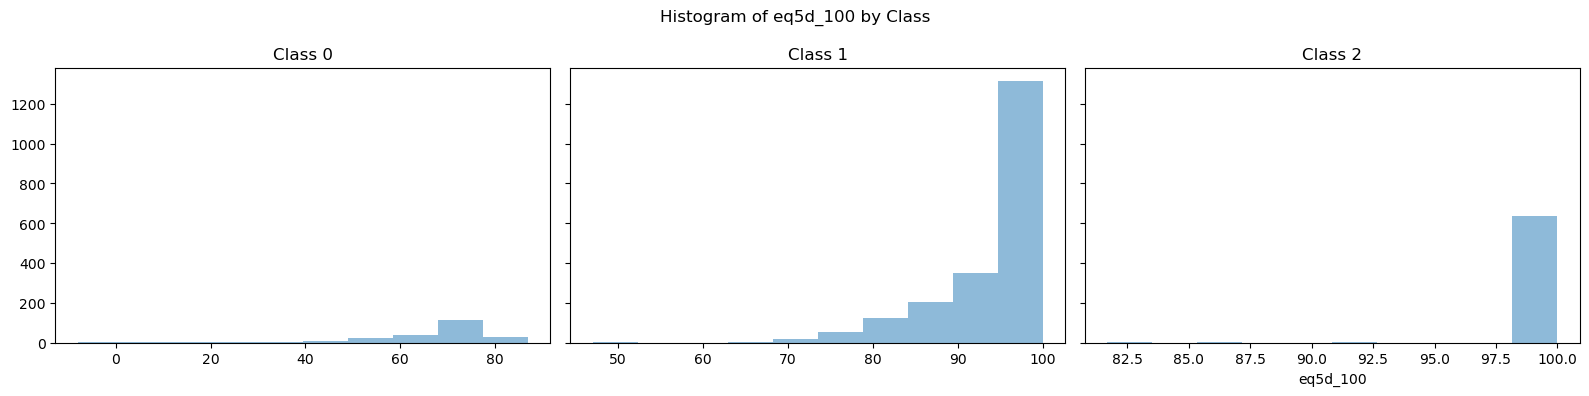

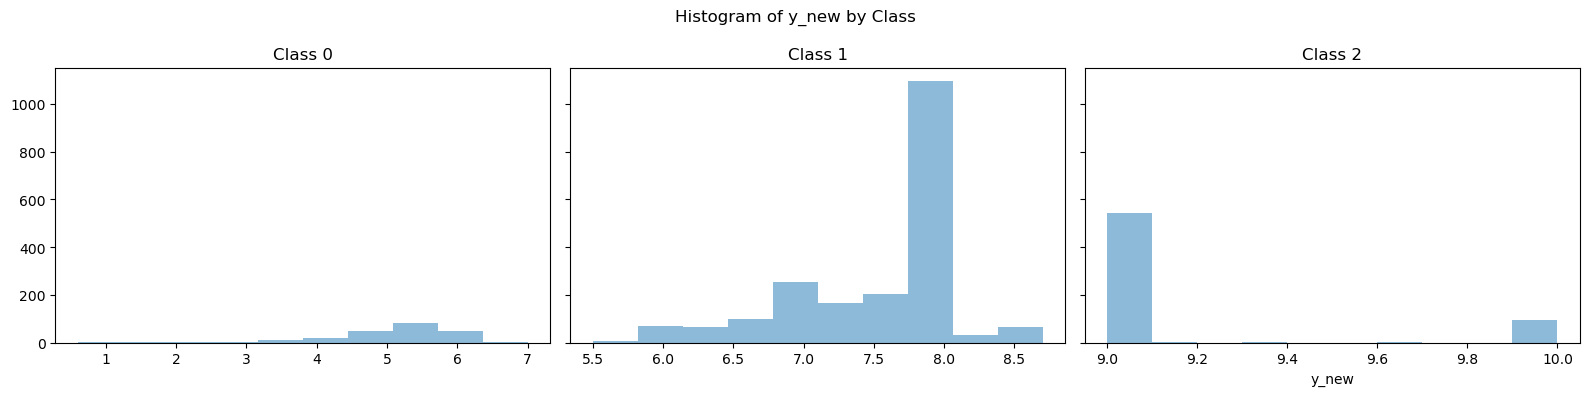

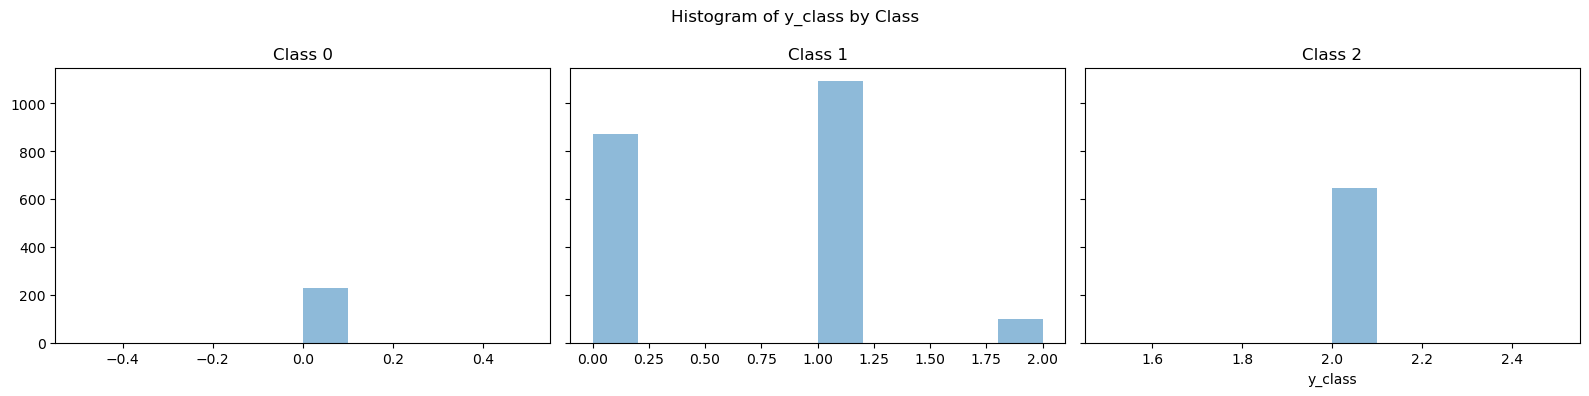

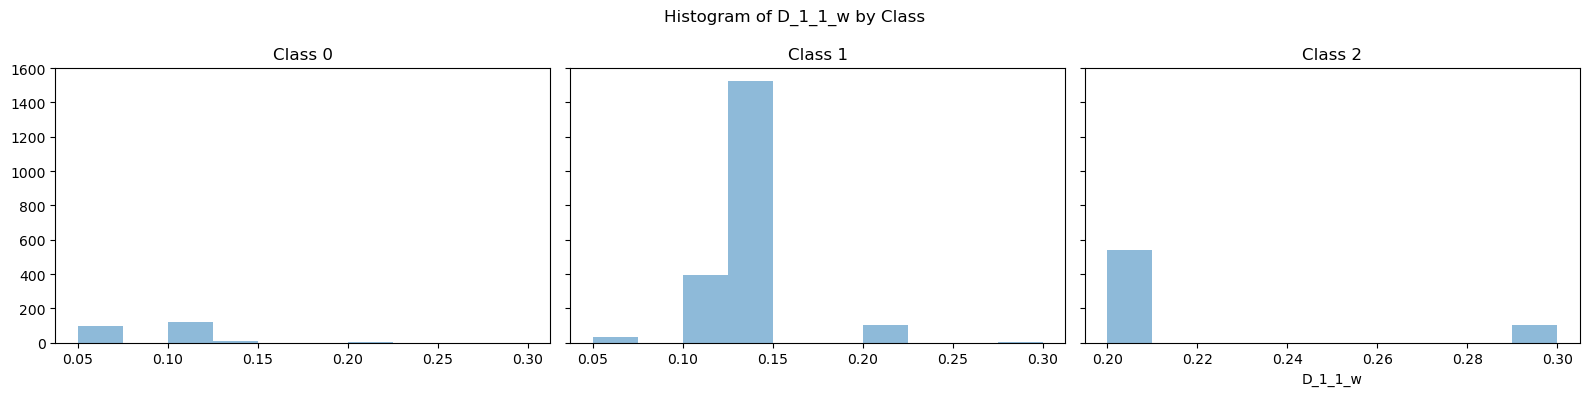

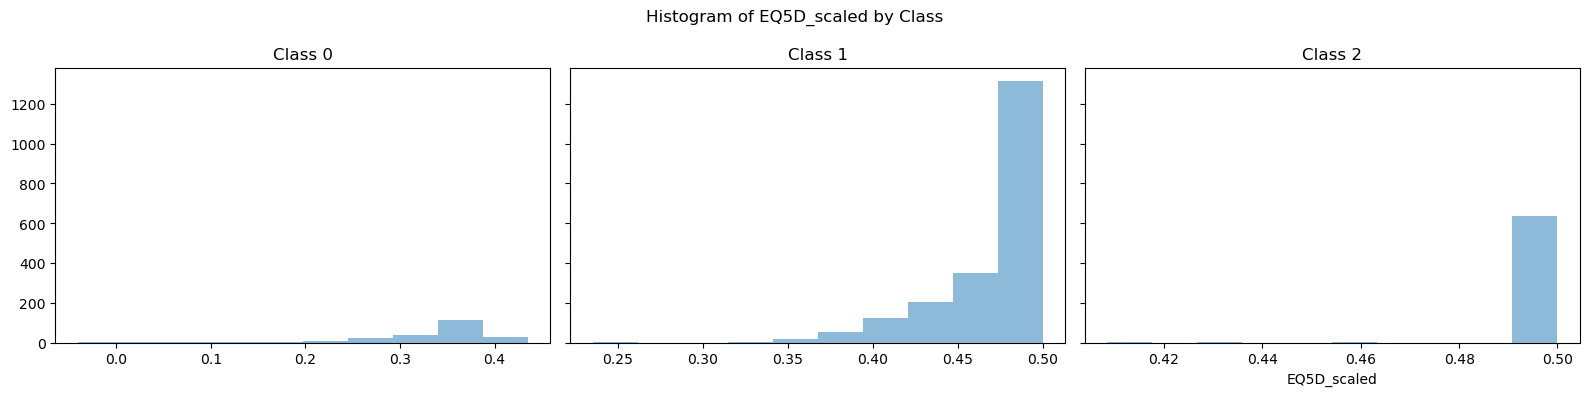

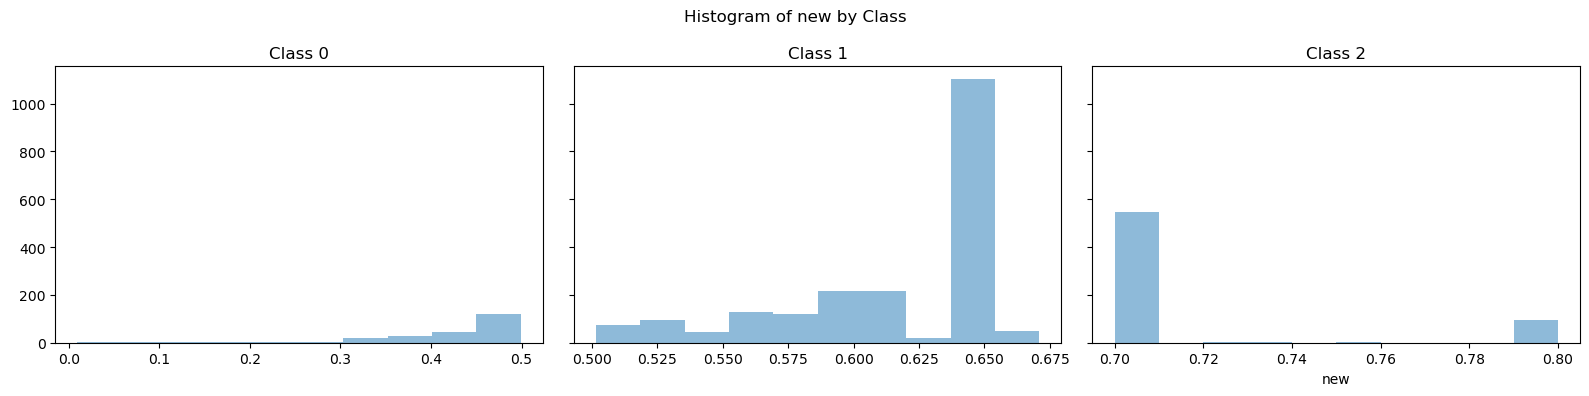

In [14]:
import matplotlib.pyplot as plt

num_classes = 3

for feature in df.columns[:-1]:  # Exclude the 'y_class' column
    fig, axes = plt.subplots(ncols=num_classes, figsize=(16, 4), sharey=True)
    
    for class_label in range(num_classes):
        data = df[df['class'] == class_label][feature]
        
        axes[class_label].hist(data, bins=10, alpha=0.5)
        axes[class_label].set_title(f'Class {class_label}')
    
    plt.suptitle(f'Histogram of {feature} by Class')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()